In [2]:
# Now with tensorflow

import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

pickle_file = 'housingNantesAllInfo.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_prices_labels = save['train_prices_labels']
  train_nbRooms_labels = save['train_nbRooms_labels']
  train_surfaceHouse_labels = save['train_surfaceHouse_labels']
  train_surfaceLand_labels = save['train_surfaceLand_labels']
  train_nbPictures_labels = save['train_nbPictures_labels']
  valid_dataset = save['valid_dataset']
  valid_prices_labels = save['valid_prices_labels']
  valid_nbRooms_labels = save['valid_nbRooms_labels']
  valid_surfaceHouse_labels = save['valid_surfaceHouse_labels']
  valid_surfaceLand_labels = save['valid_surfaceLand_labels']
  valid_nbPictures_labels = save['valid_nbPictures_labels']



  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_prices_labels.shape,train_nbRooms_labels.shape,train_surfaceHouse_labels.shape,train_surfaceLand_labels.shape,train_nbPictures_labels.shape)
  print('Validation set', valid_dataset.shape, valid_prices_labels.shape,valid_nbRooms_labels.shape,valid_surfaceHouse_labels.shape,valid_surfaceLand_labels.shape,valid_nbPictures_labels.shape)

image_size = 56

('Training set', (457, 56, 56), (457, 1), (457, 1), (457, 1), (457, 1), (457, 1))
('Validation set', (196, 56, 56), (196, 1), (196, 1), (196, 1), (196, 1), (196, 1))


In [3]:
# clean prices == 0

price_equals_zero_list = []

for i,price in enumerate(train_prices_labels):
    if price == 0:
        price_equals_zero_list.append(i)  

print len(price_equals_zero_list)   

new_dim = train_prices_labels.shape[0]-len(price_equals_zero_list)

train_labels_prices_no_zeros = np.zeros((new_dim, 1))

train_labels_nbRooms_no_zeros = np.zeros((new_dim, 1))
train_labels_surfaceHouse_no_zeros = np.zeros((new_dim, 1))
train_labels_surfaceLand_no_zeros = np.zeros((new_dim, 1))
train_labels_nbPictures_no_zeros = np.zeros((new_dim, 1))

train_images_no_zeros = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(train_prices_labels):
    if price != 0:
        train_labels_prices_no_zeros[j][0] = price  
        j += 1

j = 0
for i,image in enumerate(train_dataset):
    if i not in price_equals_zero_list:
        train_images_no_zeros[j,:,:] = image  
        j += 1

j = 0
for i,nbRooms in enumerate(train_nbRooms_labels):
    if i not in price_equals_zero_list:
        train_labels_nbRooms_no_zeros[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(train_surfaceHouse_labels):
    if i not in price_equals_zero_list:
        train_labels_surfaceHouse_no_zeros[j][0] = surfaceHouse  
        j += 1

j = 0
for i,surfaceLand in enumerate(train_surfaceLand_labels):
    if i not in price_equals_zero_list:
        train_labels_surfaceLand_no_zeros[j][0] = surfaceLand  
        j += 1

j = 0
for i,nbPictures in enumerate(train_nbPictures_labels):
    if i not in price_equals_zero_list:
        train_labels_nbPictures_no_zeros[j][0] = nbPictures  
        j += 1
        
# for validation:

price_equals_zero_list = []

for i,price in enumerate(valid_prices_labels):
    if price == 0:
        price_equals_zero_list.append(i)  

print len(price_equals_zero_list)   

new_dim = valid_prices_labels.shape[0]-len(price_equals_zero_list) 

valid_labels_prices_no_zeros = np.zeros((new_dim, 1))
valid_labels_nbRooms_no_zeros = np.zeros((new_dim, 1))
valid_labels_surfaceHouse_no_zeros = np.zeros((new_dim, 1))
valid_labels_surfaceLand_no_zeros = np.zeros((new_dim, 1))
valid_labels_nbPictures_no_zeros = np.zeros((new_dim, 1))

valid_images_no_zeros = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(valid_prices_labels):
    if price != 0:
        valid_labels_prices_no_zeros[j][0] = price  
        j += 1

j = 0
for i,image in enumerate(valid_dataset):
    if i not in price_equals_zero_list:
        valid_images_no_zeros[j,:,:] = image  
        j += 1    

j = 0        
for i,nbRooms in enumerate(valid_nbRooms_labels):
    if i not in price_equals_zero_list:
        valid_labels_nbRooms_no_zeros[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(valid_surfaceHouse_labels):
    if i not in price_equals_zero_list:
        valid_labels_surfaceHouse_no_zeros[j][0] = surfaceHouse  
        j += 1

j = 0
for i,surfaceLand in enumerate(valid_surfaceLand_labels):
    if i not in price_equals_zero_list:
        valid_labels_surfaceLand_no_zeros[j][0] = surfaceLand  
        j += 1

j = 0
for i,nbPictures in enumerate(valid_nbPictures_labels):
    if i not in price_equals_zero_list:
        valid_labels_nbPictures_no_zeros[j][0] = nbPictures  
        j += 1

15
2


In [4]:
# clean surfaceHouse == 0

surface_equals_zero_list = []

for i,surface in enumerate(train_labels_surfaceHouse_no_zeros):
    if surface == float(0):
        surface_equals_zero_list.append(i)  

print len(surface_equals_zero_list)   

new_dim = train_labels_prices_no_zeros.shape[0]-len(surface_equals_zero_list) 

train_labels_prices_surface_clean = np.zeros((new_dim, 1))

train_labels_nbRooms_surface_clean = np.zeros((new_dim, 1))
train_labels_surfaceHouse_surface_clean = np.zeros((new_dim, 1))
train_labels_surfaceLand_surface_clean = np.zeros((new_dim, 1))
train_labels_nbPictures_surface_clean = np.zeros((new_dim, 1))

train_images_surface_clean = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(train_labels_prices_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_prices_surface_clean[j][0] = price  
        j += 1
        
j = 0
for i,image in enumerate(train_images_no_zeros):
    if i not in surface_equals_zero_list:
        train_images_surface_clean[j,:,:] = image  
        j += 1    
        
j = 0
for i,nbRooms in enumerate(train_labels_nbRooms_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_nbRooms_surface_clean[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(train_labels_surfaceHouse_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_surfaceHouse_surface_clean[j][0] = surfaceHouse  
        j += 1
        
j = 0
for i,surfaceLand in enumerate(train_labels_surfaceLand_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_surfaceLand_surface_clean[j][0] = surfaceLand  
        j += 1

j = 0
for i,nbPictures in enumerate(train_labels_nbPictures_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_nbPictures_surface_clean[j][0] = nbPictures  
        j += 1 

# validation
surface_equals_zero_list = []

for i,surface in enumerate(valid_labels_surfaceHouse_no_zeros):
    if surface == float(0):
        surface_equals_zero_list.append(i)  

print len(surface_equals_zero_list)   

new_dim = valid_labels_prices_no_zeros.shape[0]-len(surface_equals_zero_list) 

valid_labels_prices_surface_clean = np.zeros((new_dim, 1))

valid_labels_nbRooms_surface_clean = np.zeros((new_dim, 1))
valid_labels_surfaceHouse_surface_clean = np.zeros((new_dim, 1))
valid_labels_surfaceLand_surface_clean = np.zeros((new_dim, 1))
valid_labels_nbPictures_surface_clean = np.zeros((new_dim, 1))

valid_images_surface_clean = np.zeros((new_dim, image_size,image_size))


j = 0
for i,price in enumerate(valid_labels_prices_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_prices_surface_clean[j][0] = price  
        j += 1
        
j = 0
for i,image in enumerate(valid_images_no_zeros):
    if i not in surface_equals_zero_list:
        valid_images_surface_clean[j,:,:] = image  
        j += 1    
        
j = 0
for i,nbRooms in enumerate(valid_labels_nbRooms_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_nbRooms_surface_clean[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(valid_labels_surfaceHouse_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_surfaceHouse_surface_clean[j][0] = surfaceHouse  
        j += 1
        
j = 0
for i,surfaceLand in enumerate(valid_labels_surfaceLand_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_surfaceLand_surface_clean[j][0] = surfaceLand  
        j += 1
        
j = 0
for i,nbPictures in enumerate(valid_labels_nbPictures_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_nbPictures_surface_clean[j][0] = nbPictures  
        j += 1 

43
21


In [5]:
train_labels_nbRooms_surface_clean.shape[0]

399

In [6]:
# reformat prices to have then between 0 and 1

max_value = max(max(train_labels_prices_surface_clean),max(valid_labels_prices_surface_clean))

train_prices_labels = train_labels_prices_surface_clean / max_value

valid_prices_labels = valid_labels_prices_surface_clean / max_value


train_nbRooms_labels = train_labels_nbRooms_surface_clean
train_surfaceHouse_labels = train_labels_surfaceHouse_surface_clean
train_surfaceLand_labels = train_labels_surfaceLand_surface_clean
train_nbPictures_labels = train_labels_nbPictures_surface_clean
valid_nbRooms_labels = valid_labels_nbRooms_surface_clean
valid_surfaceHouse_labels = train_labels_surfaceHouse_surface_clean
valid_surfaceLand_labels = valid_labels_surfaceLand_surface_clean
valid_nbPictures_labels = valid_labels_nbPictures_surface_clean


In [37]:
# reformat images to 2d array 56*56
train_images = train_images_surface_clean.reshape((-1, image_size * image_size)).astype(np.float32)
valid_images = valid_images_surface_clean.reshape((-1, image_size * image_size)).astype(np.float32)


# build the dataset for complementary info from json files
nb_variables = 5

train_info = np.zeros((train_images.shape[0],nb_variables+train_images.shape[1]))

# Reformat the variables to have them between -1 and 1
nbRooms_max = max(max(train_nbRooms_labels), max(valid_nbRooms_labels))
surface_max = max(max(train_surfaceHouse_labels), max(valid_surfaceHouse_labels))
surfaceLand_max = max(max(train_surfaceLand_labels), max(valid_surfaceLand_labels))
nbPictures_max = max(max(train_nbPictures_labels), max(valid_nbPictures_labels))

for i in range(train_images.shape[0]):
    train_info[i][0] = ( train_nbRooms_labels[i] - nbRooms_max /2 ) / nbRooms_max
    train_info[i][1] = ( train_surfaceHouse_labels[i] - surface_max /2 ) / surface_max
    train_info[i][2] = ( train_surfaceLand_labels[i] - surfaceLand_max /2 ) / surfaceLand_max
    train_info[i][3] = ( train_nbPictures_labels[i] - nbPictures_max /2 ) / nbPictures_max
    
    for j in range(4, train_images.shape[1]):
        train_info[i][j] = train_images[i][j]

    
valid_info = np.zeros((valid_images.shape[0],nb_variables + valid_images.shape[1]))

for i in range(valid_images.shape[0]):
    valid_info[i][0] = ( valid_nbRooms_labels[i] - nbRooms_max /2 ) / nbRooms_max
    valid_info[i][1] = ( valid_surfaceHouse_labels[i] - surface_max /2 ) / surface_max
    valid_info[i][2] = ( valid_surfaceLand_labels[i] - surfaceLand_max /2 ) / surfaceLand_max
    valid_info[i][3] = ( valid_nbPictures_labels[i] - nbPictures_max /2 ) / nbPictures_max
    
    for j in range(4, valid_images.shape[1]):
        valid_info[i][j] = valid_images[i][j] 
        

In [64]:
# parameters to the function graph
num_labels= 1
dtype = tf.float32

batch_size = 40
hidden_layer_size = 10
regularization_beta = 5e-4


graph = tf.Graph()
with graph.as_default():

  # Input data.
  # Load the training, validation into constants that are
  # attached to the graph.
    tf_train_info = tf.placeholder(dtype, shape=(batch_size,train_info.shape[1]))
    tf_train_price = tf.placeholder(dtype, shape=(batch_size,train_prices_labels.shape[1]))
    tf_valid_info = tf.placeholder(dtype, shape=[None,train_info.shape[1]])
  
  # Variables.
    
    # hidden layer
    
    weights_hidden = tf.Variable(tf.truncated_normal([train_info.shape[1], hidden_layer_size]))
    biases_hidden = tf.Variable(tf.zeros([hidden_layer_size]))
    hidden = tf.nn.relu(tf.matmul(tf_train_info , weights_hidden) + biases_hidden)
    
    # output layer
    
    weights_output = tf.Variable(tf.truncated_normal([hidden_layer_size,num_labels]))
    biases_output = tf.Variable(tf.zeros([num_labels]))
    
    # Training
    
    price_estimation = tf.matmul(hidden, weights_output) + biases_output
    
    loss = tf.reduce_sum(tf.square(price_estimation - tf_train_price))/train_prices_labels.shape[0]
  
    # L2 regularization
    
    regularizers = (tf.nn.l2_loss(weights_hidden) + tf.nn.l2_loss(biases_hidden) +
                   tf.nn.l2_loss(weights_output) + tf.nn.l2_loss(biases_output))
    
    loss = loss + regularization_beta * regularizers
 
  # Optimizer.
  # We are going to find the minimum of this loss using AdagradOptimizer.
  #  AdagradOptimizer
    optimizer = tf.train.AdagradOptimizer(0.01).minimize(loss)
    #optimizer = tf.train.MomentumOptimizer(5, 0.001).minimize(loss)
  
  # Predictions for the training and validation.
  # Predictions
    
    train_prediction = price_estimation
    
    hidden_validation = tf.nn.relu(tf.matmul(tf_valid_info, weights_hidden) + biases_hidden)
    valid_prediction = tf.matmul(hidden_validation, weights_output) + biases_output
    

In [65]:
num_steps = 100001

def accuracy(prediction, price):
  return np.mean(100 - 100*np.abs((prediction - price) / price))

with tf.Session(graph=graph) as session:
  # This is a one-time operation which ensures the parameters get initialized as
  # we described in the graph: random weights for the matrix, zeros for the
  # biases. 
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_info.shape[0] - batch_size)
    batch_data = train_info[offset:(offset+batch_size),:]
    batch_labels = train_prices_labels[offset:(offset+batch_size),:]
    feed_dict = {tf_train_info: batch_data,tf_train_price:batch_labels,tf_valid_info:valid_info}
    
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the loss value and the training predictions returned as numpy
    # arrays.
    _, l, predictions, valid_predictions, weight, bias = session.run([optimizer, loss, train_prediction, valid_prediction]
                                        , feed_dict=feed_dict)
    
    if (step % 1000 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Training accuracy: %.1f%%' % accuracy(
        predictions, batch_labels))
      # Calling .eval() on valid_prediction is basically like calling run(), but
      # just to get that one numpy array. Note that it recomputes all its graph
      # dependencies.
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_predictions, valid_prices_labels))

        

Initialized
Loss at step 0: 64.882881
Training accuracy: -20928.0%
Validation accuracy: -16148.7%
Loss at step 1000: 6.140525
Training accuracy: -1219.0%
Validation accuracy: -5039.4%
Loss at step 2000: 5.873333
Training accuracy: -245.9%
Validation accuracy: -4604.8%
Loss at step 3000: 5.763951
Training accuracy: -308.3%
Validation accuracy: -4408.9%
Loss at step 4000: 5.663961
Training accuracy: -135.5%
Validation accuracy: -4288.5%
Loss at step 5000: 5.575045
Training accuracy: -36.8%
Validation accuracy: -4215.0%
Loss at step 6000: 5.488382
Training accuracy: -40.2%
Validation accuracy: -4149.9%
Loss at step 7000: 5.404892
Training accuracy: -15.2%
Validation accuracy: -4084.8%
Loss at step 8000: 5.328044
Training accuracy: -29.4%
Validation accuracy: -4026.8%
Loss at step 9000: 5.244816
Training accuracy: 2.1%
Validation accuracy: -3970.8%
Loss at step 10000: 5.166915
Training accuracy: -6.4%
Validation accuracy: -3943.6%
Loss at step 11000: 5.090077
Training accuracy: 29.0%
Valid

('weight', array([ 0.1439344]))
('bias', array([ 0.20662068]))


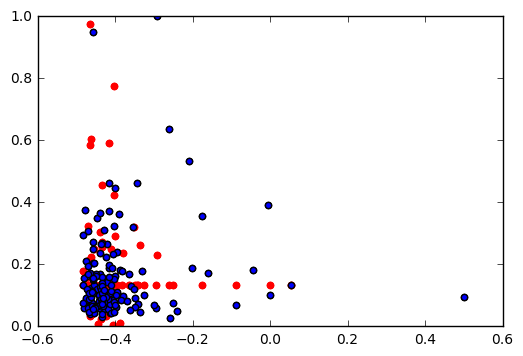

array([[ -2.64249921e+00],
       [  1.32533312e-01],
       [  6.03118896e-01],
       [  4.68913937e+00],
       [  2.38447070e-01],
       [  9.76549268e-01],
       [  8.47297668e+00],
       [  1.56049585e+01],
       [  4.72682858e+00],
       [  1.32533312e-01],
       [  1.32533312e-01],
       [  2.30585337e-02],
       [ -1.41770887e+00],
       [  1.32533312e-01],
       [  1.32533312e-01],
       [  1.11884475e-02],
       [  1.61203131e-01],
       [  1.95953286e+00],
       [  5.58227158e+00],
       [ -2.45247030e+00],
       [  1.59420535e-01],
       [  1.32533312e-01],
       [  3.02880907e+00],
       [  1.32494473e+00],
       [  5.84327698e-01],
       [  1.32533312e-01],
       [  4.71539116e+00],
       [ -8.54591250e-01],
       [  3.05763268e+00],
       [  1.74740434e+00],
       [  2.91971445e-01],
       [ -6.19256496e-01],
       [  3.60223365e+00],
       [ -8.66928339e-01],
       [  4.68066335e-03],
       [  3.44066620e-02],
       [  1.32533312e-01],
 

In [90]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from pylab import *

x = []

for i in range(valid_info.shape[0]):
    x.append(valid_info[i][1])

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
result_lr = regr.fit(train_info, train_prices_labels)

prices_estimation = result_lr.predict(valid_info)

w,b = polyfit(x, valid_prices_labels, 1)

print('weight', w)
print('bias', b)

#pred_w = weight
#pred_b = bias

#pred_y = w*x + b

plt.scatter(x,valid_predictions,color="r")

#plt.plot(x, pred_y,color="g")

plt.scatter(x, valid_prices_labels)
plt.ylim(range(0,2))

plt.show()


valid_predictions


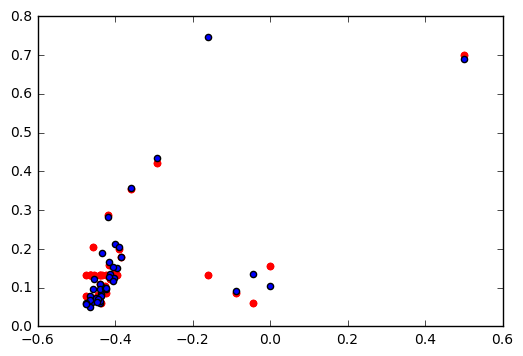

Rsquared on train:  0.995638471081
Rsquared on validation:  -9.12467925506e+18


In [87]:

x = []
y = []

for i in range(batch_data.shape[0]):
    x.append(batch_data[i][1])
    y.append(predictions[i][0])

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
result_lr = regr.fit(train_info, train_prices_labels)

prices_estimation = result_lr.predict(valid_info)

#w,b = polyfit(x, train_prices_labels, 1)

#print('weight', w)
#print('bias', b)

#pred_w = weight
#pred_b = bias

#pred_y = w*x + b

plt.scatter(x, y,color="r")

#plt.plot(x, pred_y,color="g")

plt.scatter(x, batch_labels)

plt.show()

print 'Rsquared on train: ', result_lr.score(train_info, train_prices_labels)
print 'Rsquared on validation: ', result_lr.score(valid_info, valid_prices_labels)




In [86]:
predictions

array([[ 0.15850049],
       [ 0.13253134],
       [ 0.13253134],
       [ 0.06085721],
       [ 0.08048528],
       [ 0.13253134],
       [ 0.13253134],
       [ 0.06042022],
       [ 0.13253134],
       [ 0.13253134],
       [ 0.08658713],
       [ 0.28805846],
       [ 0.13189173],
       [ 0.06332296],
       [ 0.08351272],
       [ 0.13253134],
       [ 0.06278592],
       [ 0.70007318],
       [ 0.12207216],
       [ 0.13253134],
       [ 0.10990824],
       [ 0.07787436],
       [ 0.12951511],
       [ 0.20543975],
       [ 0.13253134],
       [ 0.13589737],
       [ 0.13253134],
       [ 0.35544038],
       [ 0.42107791],
       [ 0.10548256],
       [ 0.20023328],
       [ 0.13253134],
       [ 0.13253134],
       [ 0.07456464],
       [ 0.15588158],
       [ 0.08145398],
       [ 0.13253134],
       [ 0.18025655],
       [ 0.07574743],
       [ 0.08678383]], dtype=float32)

In [85]:
x

[-0.41699999999999998,
 -0.43510000000000004,
 -0.46625,
 -0.43730000000000002,
 -0.436,
 -0.439,
 -0.39500000000000002,
 -0.043999999999999997,
 -0.40089999999999998,
 -0.46200000000000002,
 -0.42299999999999999,
 -0.41899999999999998,
 -0.40500000000000003,
 -0.46600000000000003,
 -0.435,
 -0.46400000000000002,
 -0.438,
 0.5,
 -0.41299999999999998,
 -0.40300000000000002,
 -0.44,
 -0.47599999999999998,
 -0.41699999999999998,
 -0.45824999999999999,
 -0.16,
 -0.40500000000000003,
 -0.44,
 -0.35999999999999999,
 -0.29099999999999998,
 -0.42499999999999999,
 -0.39100000000000001,
 -0.42399999999999999,
 -0.47499999999999998,
 -0.45000000000000001,
 0.0,
 -0.44400000000000001,
 -0.45569999999999999,
 -0.38400000000000001,
 -0.44700000000000001,
 -0.087999999999999995]

In [84]:
batch_data

array([[-0.28571429, -0.417     , -0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.42857143, -0.4351    , -0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.42857143, -0.46625   , -0.5       , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [-0.21428571, -0.384     , -0.48627923, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42857143, -0.447     , -0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.42857143, -0.088     , -0.48520168, ...,  0.        ,
         0.        ,  0.        ]])

In [130]:
count = 0
for surface in train_surfaceHouse_labels:
    if surface[0] == float(0):
        count += 1
count

43

In [131]:
len(train_surfaceHouse_labels)

442

In [132]:
count = 0
for surface in valid_surfaceHouse_labels:
    if surface[0] == float(0):
        count += 1
count

21

In [78]:
train_info[2]

array([-0.42857143, -0.462     , -0.5       , -0.3       ])

In [79]:
batch_data.shape

(40, 3141)

In [47]:
train_info

array([[-0.28571429, -0.41116   , -0.5       , -0.4       ],
       [-0.42857143, -0.458     , -0.5       , -0.3       ],
       [-0.42857143, -0.462     , -0.5       , -0.3       ],
       ..., 
       [-0.42857143, -0.449     , -0.5       , -0.2       ],
       [-0.14285714, -0.2       , -0.29526597, -0.25      ],
       [-0.28571429, -0.368     , -0.5       , -0.1       ]])

In [64]:
comp_array_valid = np.zeros((valid_predictions.shape[0],2))

for i in range(valid_predictions.shape[0]):
    comp_array_valid[i][0] = valid_predictions[i][0]
    comp_array_valid[i][1] = valid_prices_labels[i][0]
    
comp_array_train = np.zeros((predictions.shape[0],2))

for i in range(predictions.shape[0]):
    comp_array_train[i][0] = predictions[i][0]
    comp_array_train[i][1] = train_prices_labels[i][0]    

In [7]:
# reformat images to 2d array 56*56
train_images = train_images_surface_clean.reshape((-1, image_size * image_size)).astype(np.float32)
valid_images = valid_images_surface_clean.reshape((-1, image_size * image_size)).astype(np.float32)



In [43]:
train_prices_labels.shape[0]

399

In [66]:
valid_predictions.shape

(173, 1)

In [67]:
valid_info.shape

(173, 3141)